### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [2]:
# Suma de los valores de la columna 'Precio' de todas las tiendas
subTotal_ventas_tienda = tienda['Precio'].sum()
subTotal_ventas_tienda2 = tienda2['Precio'].sum()
subTotal_ventas_tienda3 = tienda3['Precio'].sum()
subTotal_ventas_tienda4 = tienda4['Precio'].sum()

# Suma de todas las tiendas
Total_ventas = subTotal_ventas_tienda + subTotal_ventas_tienda2 + subTotal_ventas_tienda3 + subTotal_ventas_tienda4

# Mostrar contenido
# (variable:,) → formateando el numero para que tenga comas como separadores de miles

print("Total de ventas")
print(f'Tienda 1: S/. {subTotal_ventas_tienda:,}')
print(f'Tienda 2: S/. {subTotal_ventas_tienda2:,}')
print(f'Tienda 3: S/. {subTotal_ventas_tienda3:,}')
print(f'Tienda 4: S/. {subTotal_ventas_tienda4:,}')

print(f'Total de ventas (4 Tiendas) : S/. {Total_ventas:,}')

Total de ventas
Tienda 1: S/. 1,150,880,400.0
Tienda 2: S/. 1,116,343,500.0
Tienda 3: S/. 1,098,019,600.0
Tienda 4: S/. 1,038,375,700.0
Total de ventas (4 Tiendas) : S/. 4,403,619,200.0


# 2. Ventas por categoría

In [3]:
# Configuracion para mostrar tabla completa
pd.set_option('display.expand_frame_repr', False)

# -- OBTENIENDO INGRESOS Y CANTIDADES --
# Obteniendo los ingresos y las cantidades (Ingresos por categoria)
ingresos_1 = tienda.groupby('Categoría del Producto')['Precio'].sum()
ingresos_2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
ingresos_3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
ingresos_4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

# Cantidad de productos vendidos por Categoría
conteo_1 = tienda['Categoría del Producto'].value_counts()
conteo_2 = tienda2['Categoría del Producto'].value_counts()
conteo_3 = tienda3['Categoría del Producto'].value_counts()
conteo_4 = tienda4['Categoría del Producto'].value_counts()

# -- CREANDO DATAFRAMES INDIVIDUALES COMBINADOS --
# Creando pares de columnas por tiendas
df_t1 = pd.concat([ingresos_1, conteo_1], axis=1)
df_t1.columns = ['Tienda 1', ' Cantidades T1']

df_t2 = pd.concat([ingresos_2, conteo_2], axis=1)
df_t2.columns = ['Tienda 2', ' Cantidades T2']

df_t3 = pd.concat([ingresos_3, conteo_3], axis=1)
df_t3.columns = ['Tienda 3', ' Cantidades T3']

df_t4 = pd.concat([ingresos_4, conteo_4], axis=1)
df_t4.columns = ['Tienda 4', ' Cantidades T4']

# -- UNIENDO 4 PARES Y ORDENANDO POR INGRESOS TOTALES --
# Unir todo por índice (Categoría del Producto)
df_unificado = pd.concat([df_t1, df_t2, df_t3, df_t4], axis=1)

# Calcular el total de ingresos (sin formatear aun) para ordenar
df_unificado['Total Ingresos'] = df_unificado[['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']].sum(axis=1)

# Ordenar por total
df_ordenado = df_unificado.sort_values(by='Total Ingresos', ascending=False)

# -- Formatear ingressos con 'S/.' --
# Copiar para formatear sin afectar orden
df_final = df_ordenado.copy()

# Formatear solo columnas de ingresos
for col in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4', 'Total Ingresos']:
  df_final[col] = df_final[col].map(lambda x: f'S/. {x:,}')

# -- RESULTADO --
print(df_final)

                                  Tienda 1   Cantidades T1           Tienda 2   Cantidades T2           Tienda 3   Cantidades T3           Tienda 4   Cantidades T4       Total Ingresos
Categoría del Producto                                                                                                                                                                  
Electrónicos             S/. 429,493,500.0             448  S/. 410,831,100.0             422  S/. 410,775,800.0             451  S/. 409,476,100.0             451  S/. 1,660,576,500.0
Electrodomésticos        S/. 363,685,200.0             312  S/. 348,567,800.0             305  S/. 329,237,900.0             278  S/. 283,260,200.0             254  S/. 1,324,751,100.0
Muebles                  S/. 187,633,700.0             465  S/. 176,426,300.0             442  S/. 201,072,100.0             499  S/. 192,528,900.0             480    S/. 757,661,000.0
Instrumentos musicales    S/. 91,299,000.0             182  S/. 104,990,300

# 3. Calificación promedio de la tienda


In [4]:
#TIENDA 1
calif_T1 = tienda['Calificación'].mean()
ventas_tienda = tienda['Precio'].sum()

#TIENDA 2
calif_T2 = tienda2['Calificación'].mean()
ventas_tienda_2 = tienda2['Precio'].sum()

#TIENDA 3
calif_T3 = tienda3['Calificación'].mean()
ventas_tienda_3 = tienda3['Precio'].sum()

#TIENDA 4
calif_T4 = tienda4['Calificación'].mean()
ventas_tienda_4 = tienda4['Precio'].sum()


# CONVERSION DE PARES A SERIES
s1 = pd.Series({'Promedio calificacion': calif_T1,'Total ventas': ventas_tienda},name='Tienda 1')
s2 = pd.Series({'Promedio calificacion': calif_T2,'Total ventas': ventas_tienda_2},name='Tienda 2')
s3 = pd.Series({'Promedio calificacion': calif_T3,'Total ventas': ventas_tienda_3},name='Tienda 3')
s4 = pd.Series({'Promedio calificacion': calif_T4,'Total ventas': ventas_tienda_4},name='Tienda 4')

resumen = pd.concat([s1, s2, s3, s4],axis=1) # Conserva los datos numericos originales, para calculos futuros.

# Si quieres mostrar las ventas formateadas como moneda, hazlo en una copia.
resumen_formateado = resumen.copy().astype(object)

# Opcional: Formatear las ventas con 'S/. ' y separador de miles.
# Aquí formateamos solo la fila de "Total ventas"
resumen_formateado.loc['Total ventas'] = resumen.loc['Total ventas'].apply(lambda x: f'S/. {x:,.2f}')

# La columna de calificaciones puede que no necesite un formato especial,
# pero podrías redondearla.
resumen_formateado.loc['Promedio calificacion'] = resumen.loc['Promedio calificacion'].apply(lambda x: f'{x:.2f}')

# Establecer un formato para todos los números de punto flotante
# '.2f' significa 2 decimales
pd.options.display.float_format = '{:,.2f}'.format


# -- VISUALIZACIÓN DEL DATAFRAME FORMATEADO --
# Esto te mostrará la tabla con un formato legible para el usuario.
print(resumen_formateado)

                                   Tienda 1              Tienda 2              Tienda 3              Tienda 4
Promedio calificacion                  3.98                  4.04                  4.05                  4.00
Total ventas           S/. 1,150,880,400.00  S/. 1,116,343,500.00  S/. 1,098,019,600.00  S/. 1,038,375,700.00


# 4. Productos más y menos vendidos

In [5]:
# ANÁLISIS COMPARATIVO DE PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA

# Para cada tienda, se cuenta cuántas veces se vendió cada producto y se ordenan de mayor a menor.
# Se convierte el resultado a un DataFrame con columnas renombradas para claridad.

conteo_items_T1 = tienda['Producto'].value_counts().reset_index()
conteo_items_T1.columns = ['Producto T1', 'Cantidad T1']  # Producto más vendido de la Tienda 1

conteo_items_T2 = tienda2['Producto'].value_counts().reset_index()
conteo_items_T2.columns = ['Producto T2', 'Cantidad T2']  # Producto más vendido de la Tienda 2

conteo_items_T3 = tienda3['Producto'].value_counts().reset_index()
conteo_items_T3.columns = ['Producto T3', 'Cantidad T3']  # Producto más vendido de la Tienda 3

conteo_items_T4 = tienda4['Producto'].value_counts().reset_index()
conteo_items_T4.columns = ['Producto T4', 'Cantidad T4']  # Producto más vendido de la Tienda 4

# Se combinan los DataFrames horizontalmente (por columnas), comparando por posición de fila (no por nombre de producto).
# Esto permite comparar directamente el ranking de productos más vendidos entre tiendas.
df_unificado_items = pd.concat(
    [conteo_items_T1, conteo_items_T2, conteo_items_T3, conteo_items_T4],
    axis=1
)

# Se muestra la tabla consolidada para análisis visual o exportación.
print(df_unificado_items)

                    Producto T1  Cantidad T1                  Producto T2  Cantidad T2                  Producto T3  Cantidad T3                  Producto T4  Cantidad T4
0                    Microondas           60    Iniciando en programación           65                Kit de bancas           57                     Cama box           62
1                 TV LED UHD 4K           60                   Microondas           62              Mesa de comedor           56                   Cubertería           59
2                       Armario           60                      Batería           61                    Cama king           56      Dashboards con Power BI           56
3              Secadora de ropa           58            Guitarra acústica           58                 Set de ollas           55                    Cama king           56
4                 Mesa de noche           56                    Pandereta           58                Mesa de noche           55    Carrito de co

# 5. Envío promedio por tienda

In [6]:
def mostrar_promedios_flete(tiendas):
    print("Promedio del costo de envío por tienda:")
    for i, df in enumerate(tiendas, start=1):
        promedio = df['Costo de envío'].mean()
        print(f"  Tienda T{i}: S/ {promedio:.2f}")

# Llamada
mostrar_promedios_flete([tienda, tienda2, tienda3, tienda4])

Promedio del costo de envío por tienda:
  Tienda T1: S/ 26018.61
  Tienda T2: S/ 25216.24
  Tienda T3: S/ 24805.68
  Tienda T4: S/ 23459.46


# 6. Graficas

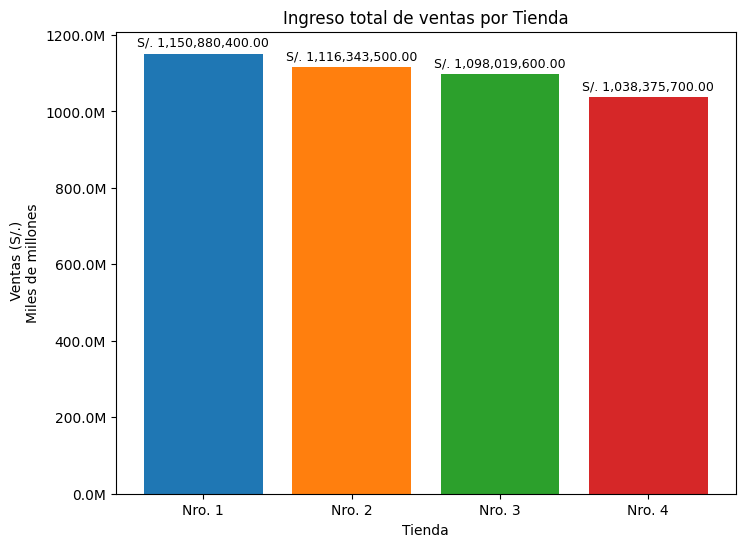

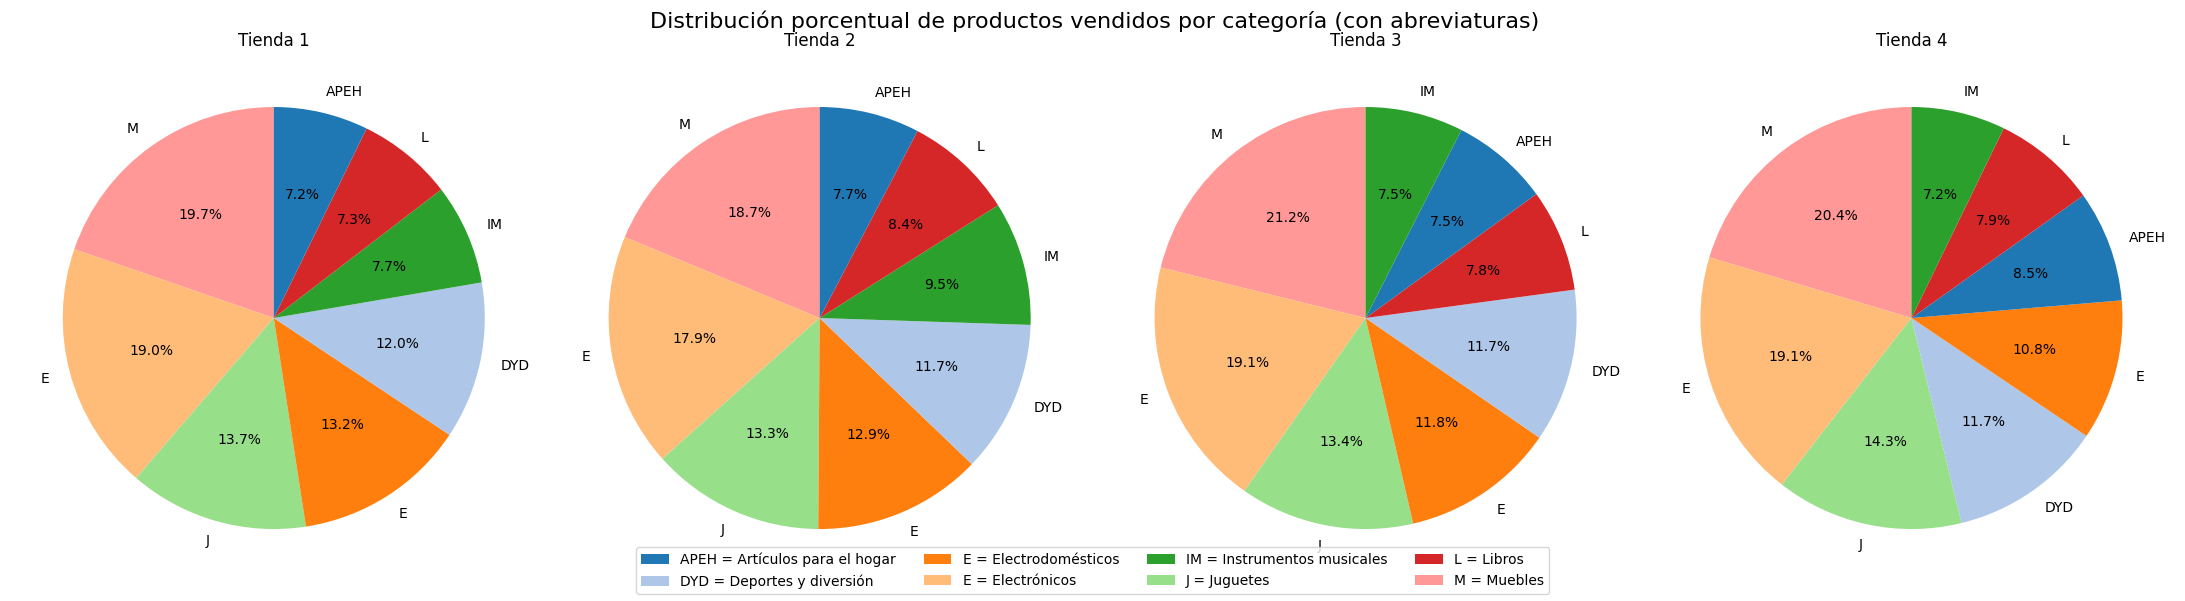

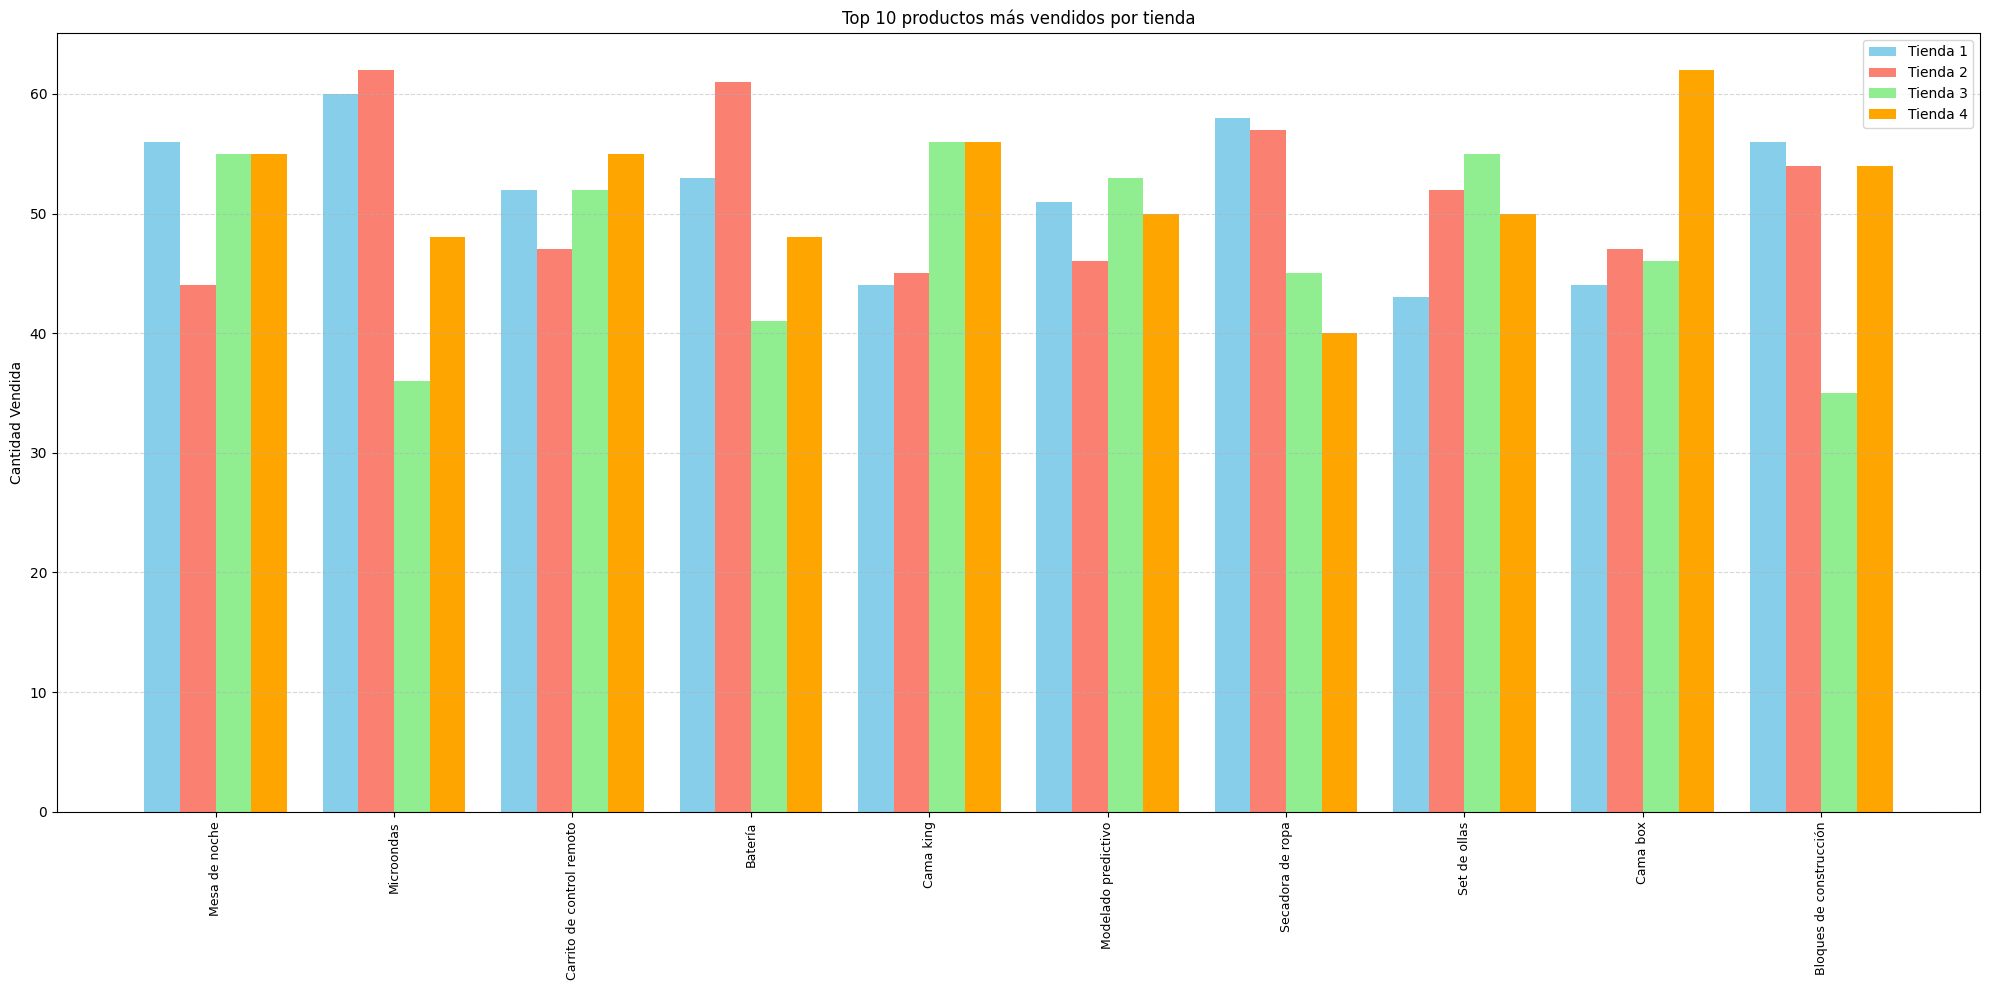

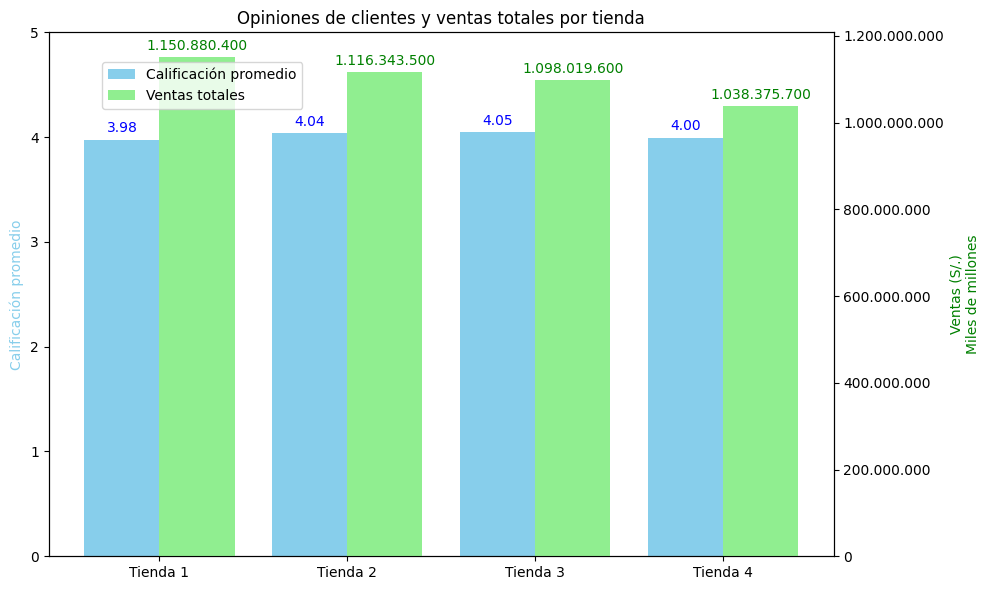

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.patches import Patch
import numpy as np

# Crear 7un DataFrame manual con esos subtotales
df_grf_1 = pd.DataFrame({
   'Tienda': ['Nro. 1', 'Nro. 2', 'Nro. 3', 'Nro. 4'],
   'Ventas': [subTotal_ventas_tienda,
              subTotal_ventas_tienda2,
              subTotal_ventas_tienda3,
              subTotal_ventas_tienda4
              ]
})

# Colores personalizados por barra
colores =['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Azul, naranja, verde, rojo

# Creacion de grafico
fig, ax = plt.subplots(figsize =(8, 6))
barras = ax.bar(df_grf_1['Tienda'], df_grf_1['Ventas'], color=colores)

# Mostrar eje Y en millones (ajuste a 1e9 si son miles de millones)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Titulos & Etiquetas
plt.title('Ingreso total de ventas por Tienda')
plt.xlabel('Tienda')
plt.ylabel(' Ventas (S/.)\nMiles de millones')

# Mostrar el monto exacto encima de cada barra
for i,v in enumerate(df_grf_1['Ventas']):
   ax.text(i, v + (v*0.01),f"S/. {v:,.2f}",ha='center', va='bottom', fontsize=9)


plt.tight_layout

# [GRAFICA 2]
# Todas las categorías únicas
todas_categorias = sorted(set(conteo_1.index) | set(conteo_2.index) | set(conteo_3.index) | set(conteo_4.index))

# Generar abreviaturas para cada categoría (iniciales o primera sílaba)
abreviaturas = {cat: ''.join([p[0] for p in cat.split()]).upper() for cat in todas_categorias}

# Asignar colores consistentes por categoría
colores_base = plt.cm.tab20.colors
colores_categoria = {cat: colores_base[i % len(colores_base)] for i, cat in enumerate(todas_categorias)}

# Listas de conteos y nombres de tiendas
conteos = [conteo_1, conteo_2, conteo_3, conteo_4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear subplots
fig, axes = plt.subplots(1, 4, figsize=(22, 6))

for i, ax in enumerate(axes):
    conteo = conteos[i].reindex(todas_categorias, fill_value=0)
    proporciones = conteo / conteo.sum()
    proporciones = proporciones.sort_values(ascending=False)

    sizes = proporciones.values
    categorias_ordenadas = proporciones.index
    labels = [abreviaturas[cat] for cat in categorias_ordenadas]
    colors = [colores_categoria[cat] for cat in categorias_ordenadas]

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(nombres_tiendas[i])

# Crear leyenda común (fuera del gráfico)
leyenda_patches = [
    Patch(facecolor=colores_categoria[cat], label=f"{abreviaturas[cat]} = {cat}")
    for cat in todas_categorias
]

# Posicionar leyenda debajo de los gráficos
fig.legend(handles=leyenda_patches, loc='lower center', ncol=4, fontsize=10)
plt.subplots_adjust(bottom=0.2)

# Título general
plt.suptitle('Distribución porcentual de productos vendidos por categoría (con abreviaturas)', fontsize=16)
plt.tight_layout()

# [GRAFICA 3] COMPARACIÓN DE PRODUCTOS ENTRE TIENDAS

# Renombrar columnas para unificar los DataFrames por nombre de producto
# Esto es importante para que el merge (unión) sea claro y las columnas no se sobreescriban
conteo_items_T1.columns = ['Producto', 'Cantidad T1']
conteo_items_T2.columns = ['Producto', 'Cantidad T2']
conteo_items_T3.columns = ['Producto', 'Cantidad T3']
conteo_items_T4.columns = ['Producto', 'Cantidad T4']

# Unificar los datos de las cuatro tiendas por el nombre del producto
# Usamos outer join para incluir todos los productos, incluso si alguno no aparece en alguna tienda
df_unificado_items = conteo_items_T1.merge(conteo_items_T2, on='Producto', how='outer') \
                                    .merge(conteo_items_T3, on='Producto', how='outer') \
                                    .merge(conteo_items_T4, on='Producto', how='outer')

# Rellenar valores faltantes (NaN) con 0
# Esto evita errores en cálculos posteriores si un producto no fue vendido en alguna tienda
df_unificado_items.fillna(0, inplace=True)

# Crear una columna con el total de ventas por producto en las 4 tiendas
df_unificado_items['Total'] = df_unificado_items[['Cantidad T1', 'Cantidad T2', 'Cantidad T3', 'Cantidad T4']].sum(axis=1)

# Ordenar los productos de mayor a menor según el total de ventas
df_unificado_items.sort_values('Total', ascending=False, inplace=True)

# Seleccionar los productos más vendidos para el gráfico
# Aquí se eligen los 10 productos con mayor cantidad total vendida
top_n = 10
df_top = df_unificado_items.head(top_n)
x = range(len(df_top))  # Posiciones para el eje X

# Definir ancho de barras para cada tienda en el gráfico de barras agrupadas
width = 0.2

# Crear figura del gráfico
plt.figure(figsize=(20, 10))  # Tamaño amplio para que los nombres de productos no se encimen

# Graficar barras para cada tienda, desplazadas en el eje X para estar una al lado de la otra
plt.bar([i - 1.5*width for i in x], df_top['Cantidad T1'], width, label='Tienda 1', color='skyblue')
plt.bar([i - 0.5*width for i in x], df_top['Cantidad T2'], width, label='Tienda 2', color='salmon')
plt.bar([i + 0.5*width for i in x], df_top['Cantidad T3'], width, label='Tienda 3', color='lightgreen')
plt.bar([i + 1.5*width for i in x], df_top['Cantidad T4'], width, label='Tienda 4', color='orange')

# Personalización del gráfico
plt.xticks(x, df_top['Producto'], rotation=90, fontsize=9)  # Nombres de productos en X
plt.ylabel('Cantidad Vendida')  # Etiqueta del eje Y
plt.title('Top 10 productos más vendidos por tienda')  # Título del gráfico
plt.legend()  # Mostrar leyenda para las tiendas
plt.tight_layout()  # Acomoda el contenido del gráfico para que no se solape
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Línea guía horizontal

# Crear el DataFrame
datos_tiendas = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación promedio': [calif_T1, calif_T2, calif_T3, calif_T4],
    'Ventas totales': [ventas_tienda, ventas_tienda_2, ventas_tienda_3, ventas_tienda_4]
})

# Posiciones para las barras
x = np.arange(len(datos_tiendas['Tienda']))
ancho_barra = 0.4

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Segundo eje Y
ax2 = ax1.twinx()

# Barras para calificación (eje izquierdo)
barras1 = ax1.bar(x - ancho_barra/2, datos_tiendas['Calificación promedio'], width=ancho_barra,
                  label='Calificación promedio', color='skyblue')

# Barras para ventas (eje derecho)
barras2 = ax2.bar(x + ancho_barra/2, datos_tiendas['Ventas totales'], width=ancho_barra,
                  label='Ventas totales', color='lightgreen')

# Configurar ejes
ax1.set_ylabel('Calificación promedio', color='skyblue')
ax1.set_ylim(0, 5)  # Límite ideal para calificaciones de 1 a 5
ax2.set_ylabel('Ventas (S/.)\nMiles de millones', color='green')

ax1.set_xticks(x)
ax1.set_xticklabels(datos_tiendas['Tienda'])
ax1.set_title('Opiniones de clientes y ventas totales por tienda')

# Formato personalizado con puntos
formateador_miles = lambda x, _: f'{x:,.0f}'.replace(',', '.')

# Aplicar al eje de ventas (derecho)
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(formateador_miles))

# Mostrar valores sobre las barras
for barra in barras1:
    altura = barra.get_height()
    ax1.annotate(f'{altura:.2f}', xy=(barra.get_x() + barra.get_width()/2, altura),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')

for barra in barras2:
    altura = barra.get_height()
    texto = f'{altura:,.0f}'.replace(',', '.')
    ax2.annotate(texto,
                  xy=(barra.get_x() + barra.get_width()/2, altura),
                  xytext=(0, 3), textcoords="offset points",
                   ha='center', va='bottom', color='green')

# Leyendas combinadas
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

# 7. Informe

---

# 📊 Análisis y Recomendación para la Venta de una Tienda – *Alura Store*

**Preparado para:** Sr. Juan
**Fecha:** 27 de julio de 2025

---

## 🧭 Introducción

El propósito de este informe es presentar una recomendación fundamentada al Sr. Juan sobre **cuál de las cuatro tiendas de su cadena Alura Store debería vender** para financiar un nuevo emprendimiento.

Se ha realizado un análisis exhaustivo de datos clave de rendimiento, incluyendo:

* Ingresos
* Calificaciones de clientes
* Costes de envío
* Desempeño de productos y categorías

El objetivo es identificar **la tienda menos eficiente** y justificar su venta con datos claros y objetivos.

---

## 📈 Desarrollo del Análisis

### 🔹 1. Ingresos Totales por Tienda

El rendimiento financiero es un factor decisivo. A continuación, se presentan los ingresos totales por tienda:

| Tienda       | Ingresos Totales         |
| ------------ | ------------------------ |
| Tienda 1     | S/. 1,150,880,400.00     |
| Tienda 2     | S/. 1,116,343,500.00     |
| Tienda 3     | S/. 1,098,019,600.00     |
| **Tienda 4** | **S/. 1,038,375,700.00** |

> **📉 La Tienda 4 es la menos rentable**, con una diferencia de más de S/. 100 millones respecto a la Tienda 1.

---

### ⭐ 2. Calificaciones Promedio de los Clientes

Estas reflejan la satisfacción del cliente:

| Tienda   | Calificación Promedio |
| -------- | --------------------- |
| Tienda 1 | 3.98                  |
| Tienda 2 | 4.04                  |
| Tienda 3 | 4.05                  |
| Tienda 4 | 4.00                  |

> Aunque las diferencias son mínimas, la **Tienda 1 tiene la calificación más baja**.
> Sin embargo, **las calificaciones no son un factor decisivo por sí solas**.

---

### 🚚 3. Coste de Envío Promedio

Un menor coste refleja una mejor eficiencia logística:

| Tienda       | Costo Promedio de Envío |
| ------------ | ----------------------- |
| Tienda 1     | S/. 26,018.61           |
| Tienda 2     | S/. 25,216.24           |
| Tienda 3     | S/. 24,805.68           |
| **Tienda 4** | **S/. 23,459.46**       |

> La **Tienda 4 tiene el envío más barato**, pero esta ventaja no compensa su bajo rendimiento global.

---

### 📦 4. Análisis de Productos y Categorías

#### 🧾 Tabla 1: Ingresos y Cantidades por Categoría

* En todas las tiendas, las categorías más fuertes son: `'Electrónicos'` y `'Electrodomésticos'`.
* Las más débiles: `'Libros'` y `'Artículos para el hogar'`.
* **La Tienda 4 muestra los ingresos más bajos en casi todas las categorías.**

#### 📊 Gráfico 1: Distribución Porcentual de Ventas por Categoría

* Confirma una composición similar en todas las tiendas.
* **La Tienda 4 tiene el menor volumen total de ventas**.

#### 🏷️ Tabla 2: Productos Más y Menos Vendidos

* Los productos populares son similares en todas las tiendas.
* **El problema en la Tienda 4 no es la demanda específica, sino el volumen total de ventas.**

---

## ✅ Conclusión y Recomendación Final

**🔍 Recomendación:** Proceder con la **venta de la Tienda 4**.

### 📌 Justificación:

* **Menor Rentabilidad:** Es la tienda con los ingresos más bajos de toda la cadena.
* **Ineficiencia General:** A pesar de tener un coste logístico favorable, no logra destacar en ventas ni en categorías clave.
* **Oportunidad de Capital:** Su venta liberará fondos valiosos para el nuevo emprendimiento del Sr. Juan.

> Las Tiendas 1, 2 y 3 muestran un rendimiento sólido, mientras que **la Tienda 4 se rezaga constantemente** en los indicadores clave de éxito comercial.

---

**📝 En resumen:**
`La recomendación es proceder con la venta de la Tienda 4.`

---
